# 01 - Load in Patient Data

Prep Output Direction

In [ ]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/corbetta_cluster/umaps/cluster_prediction'

Import Data

In [ ]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/metadata/mergedCerebellumExtensive.csv'
sheet = None

In [ ]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [ ]:
data_df.columns

In [ ]:
drop_list = ['roi_path']

In [ ]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [ ]:
data_df.columns

Set the parameters for dropping rows

In [ ]:
column = 'focal_cerebellum'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below', 'not')
value = 1 # The value to drop if found

In [ ]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

# 02 - Load in the Patient Maps

This uses the column in the above CSV which stored all of the file paths in it
- For example, from the base_directory, */tissue_segment_z_scores will look for all subjects, all session folders within subjects, and then check the tissue_segment_z_scores folder. 


In [ ]:
file_column = 'roi_path'

In [ ]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
dv_df = GiiNiiFileImport(import_path=data_df[file_column], file_pattern=None, file_column=None, process_special_values=False).run()
dv_df

# 03 - Load Map to Check Damage Within

Import Region of Interest Masks

In [21]:
base_directory = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/data/finland_maps'
shared_glob_pattern = '*.nii*'

In [22]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
iv_df = GiiNiiFileImport(import_path=base_directory, file_pattern=shared_glob_pattern).run()
iv_df

Attempting to import from: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/data/finland_maps/*.nii*


Importing niftis: 100%|██████████| 5/5 [00:00<00:00, 42.80it/s]


,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/data/finland_maps/LimbAtaxia_vs_NoLimbAtaxia_Baseline_tstat1.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/data/finland_maps/Fluent_vs_nonfluent_tstat1.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/data/finland_maps/Total_Followup_PHQ9_tstat1.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/data/finland_maps/Total_Followup_GAD7_tstat1.nii.gz,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/data/finland_maps/Total_Followup_MoCA_tstat1.nii.gz
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0


Extract Damage Scores Per Region of Interest

In [23]:
mask_path = '/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii'

In [24]:
from calvin_utils.nifti_utils.damage_score_utils import DamageScorer
damage_scorer = DamageScorer(mask_path, dv_df, iv_df)
dmg_df = damage_scorer.calculate_damage_scores('avg_in_subject')
dmg_df = damage_scorer.sort_dataframes_by_index(dmg_df)
dmg_df

,LimbAtaxia_vs_NoLimbAtaxia_Baseline_tstat1_average_target_in_subject,Fluent_vs_nonfluent_tstat1_average_target_in_subject,Total_Followup_PHQ9_tstat1_average_target_in_subject,Total_Followup_GAD7_tstat1_average_target_in_subject,Total_Followup_MoCA_tstat1_average_target_in_subject
path,,,,,
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-024/roi/sub-024_lesionMask.nii.gz,-1.004729,-0.083801,0.368875,0.432463,0.218357
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-026/roi/sub-026_lesionMask.nii.gz,3.490593,-0.411295,-0.219216,-0.258390,1.733907
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-027/roi/sub-027_lesionMask.nii.gz,-0.002652,-0.062662,0.626190,0.279598,0.693364
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-029/roi/sub-029_lesionMask.nii.gz,-2.016912,-1.095973,0.950115,0.752708,-1.688712
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-030/roi/sub-030_lesionMask.nii.gz,-1.504576,-0.161353,0.966146,0.778004,-0.905323
...,...,...,...,...,...
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-192/roi/sub-192_lesionMask.nii.gz,-0.775287,-0.734044,-0.117316,-0.014936,-1.488857
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-193/roi/sub-193_lesionMask.nii.gz,5.203824,-0.051900,0.208460,-1.786451,0.702832
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-194/roi/sub-194_lesionMask.nii.gz,-0.668327,-0.158619,0.512793,0.389416,-0.089309


# 04 - Label Outcome Columns by Which Cluster they Belong To
- copy the output of the below cell and fill it out with categorical labels. 

In [25]:
from calvin_utils.ccm_utils.symptom_specificity import get_column_labels
get_column_labels(data_df)

Please copy and paste this into the following cell to edit it: 

label_dict = {
'study_id': '',
'subject': '',
'MotorL_acute': '',
'MotorR_acute': '',
'Motor_IC_acute': '',
'MotorL_3month': '',
'MotorR_3month': '',
'Motor_IC_3month': '',
'MotorL_1year': '',
'MotorR_1year': '',
'Motor_IC_1year': '',
'motorl_f_acute': '',
'motorr_f_acute': '',
'motoric_within_acute': '',
'motoryn_acute': '',
'motor_note_acute': '',
'motor_battery_complete_acute': '',
'motoryn_3month': '',
'motor_note_3month': '',
'motor_battery_complete_3month': '',
'fim_motor_3month': '',
'motoryn_1year': '',
'motor_note_1year': '',
'motor_battery_complete_1year': '',
'fim_motor_1year': '',
'nihss_hospital_basic': '',
'nihssyn_acute': '',
'nih_note_acute': '',
'nih1a_acute': '',
'nih1b_acute': '',
'nih1c_acute': '',
'nih2_acute': '',
'nih3_acute': '',
'nih4_acute': '',
'nih5a_acute': '',
'nih5b_acute': '',
'nih6a_acute': '',
'nih6b_acute': '',
'nih7_acute': '',
'nih8_acute': '',
'nih9_acute': '',
'nih10_acute': '',
'nih

Copy tge above dictionary if you want to organize your outcomes for prediction into categories. 
- Otherwise, leave label_dict = None.

Example of a full label_dict: 
```
label_dict = {
'MotorL_acute': 'motor',
'MotorR_acute': 'motor',
'bvmt_bias_acute': 'cognitive',
'bvmt_imt_acute': 'cognitive'
}
```

In [26]:
label_dict = {
 'nih7_acute': 'ataxia',
 'nih7_3month': 'ataxia',
 'nih7_1year': 'ataxia',
 'gdss_10_3month': 'mood',
 'gdss_2_3month': 'mood',
 'gdss_12_3month': 'mood',
 'animal_raw_acute': 'fluency',
 'hvlt_perc_acute': 'fluency',
 'hvlt_perc_3month': 'fluency',
 }

# 05 - Relate damage to symptom clusters

In [27]:
data_df = data_df.fillna(0)
dmg_df = dmg_df.fillna(0)

In [28]:
dmg_df

,LimbAtaxia_vs_NoLimbAtaxia_Baseline_tstat1_average_target_in_subject,Fluent_vs_nonfluent_tstat1_average_target_in_subject,Total_Followup_PHQ9_tstat1_average_target_in_subject,Total_Followup_GAD7_tstat1_average_target_in_subject,Total_Followup_MoCA_tstat1_average_target_in_subject
path,,,,,
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-024/roi/sub-024_lesionMask.nii.gz,-1.004729,-0.083801,0.368875,0.432463,0.218357
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-026/roi/sub-026_lesionMask.nii.gz,3.490593,-0.411295,-0.219216,-0.258390,1.733907
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-027/roi/sub-027_lesionMask.nii.gz,-0.002652,-0.062662,0.626190,0.279598,0.693364
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-029/roi/sub-029_lesionMask.nii.gz,-2.016912,-1.095973,0.950115,0.752708,-1.688712
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-030/roi/sub-030_lesionMask.nii.gz,-1.504576,-0.161353,0.966146,0.778004,-0.905323
...,...,...,...,...,...
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-192/roi/sub-192_lesionMask.nii.gz,-0.775287,-0.734044,-0.117316,-0.014936,-1.488857
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-193/roi/sub-193_lesionMask.nii.gz,5.203824,-0.051900,0.208460,-1.786451,0.702832
/Volumes/HowExp/datasets/02a_Corbetta_Stroke_Lesion/BIDS_Dataset/sub-194/roi/sub-194_lesionMask.nii.gz,-0.668327,-0.158619,0.512793,0.389416,-0.089309


Index(['nih7_acute', 'nih7_3month', 'nih7_1year', 'animal_raw_acute',
       'hvlt_perc_acute', 'hvlt_perc_3month', 'gdss_2_3month',
       'gdss_10_3month', 'gdss_12_3month'],
      dtype='object') dict_keys(['nih7_acute', 'nih7_3month', 'nih7_1year', 'animal_raw_acute', 'hvlt_perc_acute', 'hvlt_perc_3month', 'gdss_2_3month', 'gdss_10_3month', 'gdss_12_3month'])


running permutation: 100%|██████████| 1000/1000 [00:04<00:00, 208.32it/s]


----
LimbAtaxia_vs_NoLimbAtaxia_Baseline_tstat1_average_target_in_subject, ataxia vs fluency
----


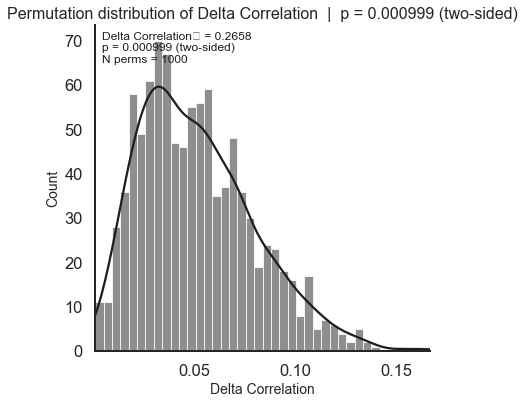

----
LimbAtaxia_vs_NoLimbAtaxia_Baseline_tstat1_average_target_in_subject, ataxia vs mood
----


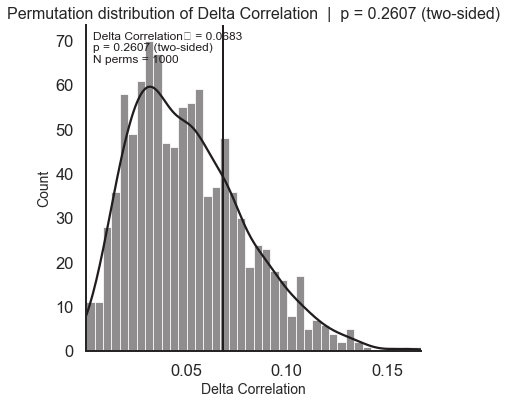

----
LimbAtaxia_vs_NoLimbAtaxia_Baseline_tstat1_average_target_in_subject, fluency vs mood
----


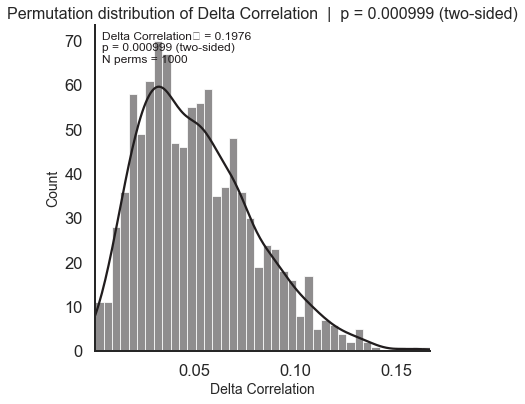

----
Fluent_vs_nonfluent_tstat1_average_target_in_subject, ataxia vs fluency
----


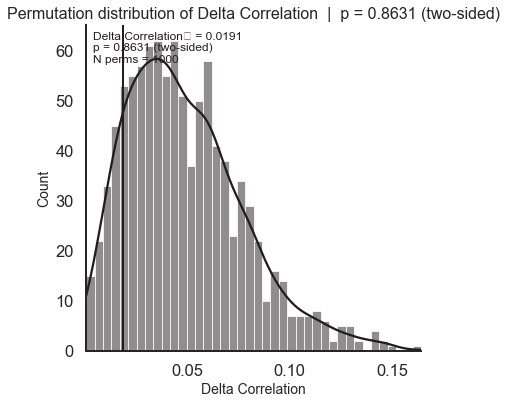

----
Fluent_vs_nonfluent_tstat1_average_target_in_subject, ataxia vs mood
----


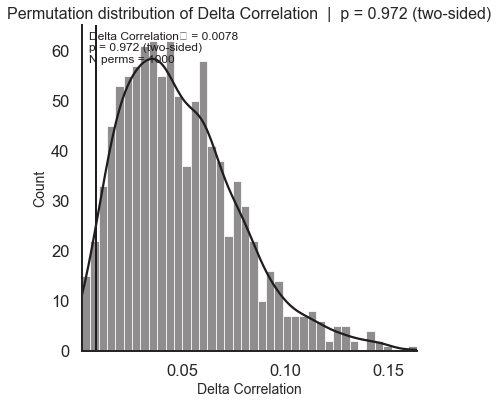

----
Fluent_vs_nonfluent_tstat1_average_target_in_subject, fluency vs mood
----


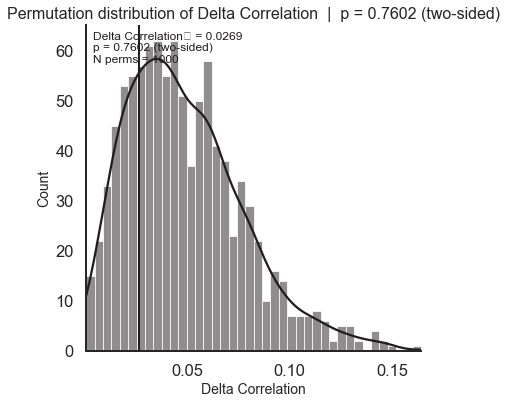

----
Total_Followup_PHQ9_tstat1_average_target_in_subject, ataxia vs fluency
----


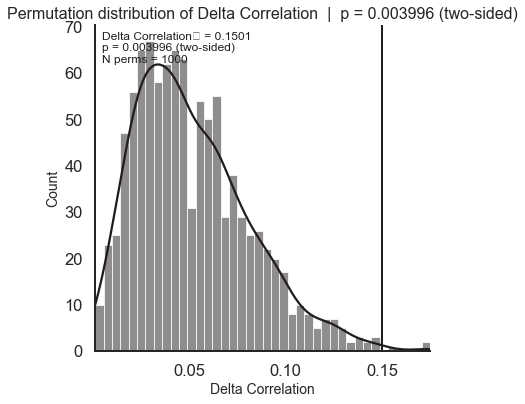

----
Total_Followup_PHQ9_tstat1_average_target_in_subject, ataxia vs mood
----


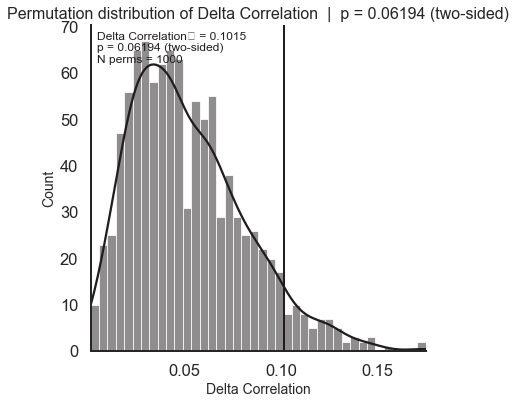

----
Total_Followup_PHQ9_tstat1_average_target_in_subject, fluency vs mood
----


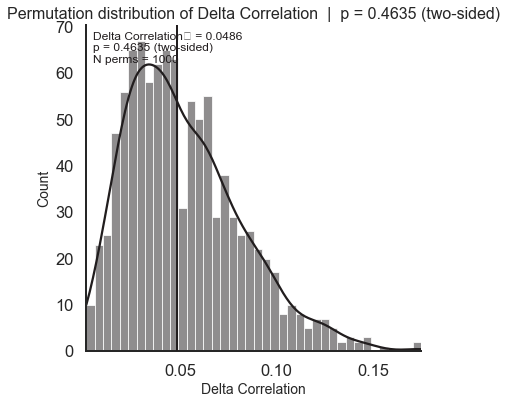

----
Total_Followup_GAD7_tstat1_average_target_in_subject, ataxia vs fluency
----


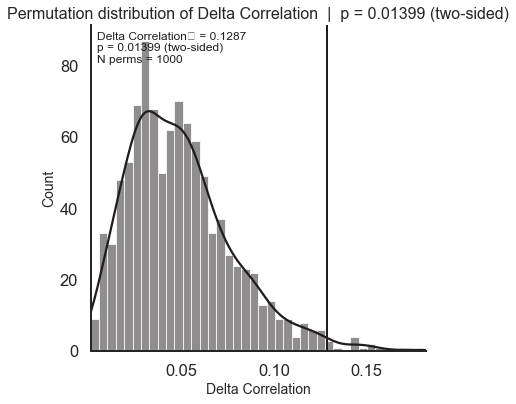

----
Total_Followup_GAD7_tstat1_average_target_in_subject, ataxia vs mood
----


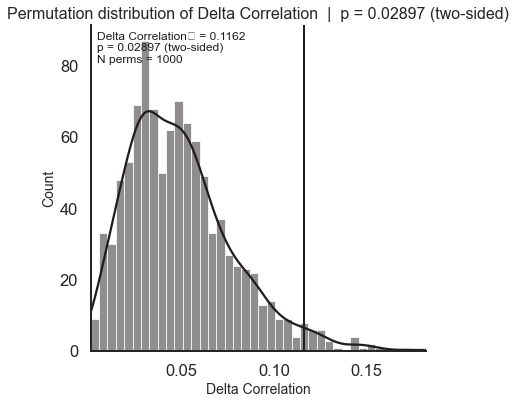

----
Total_Followup_GAD7_tstat1_average_target_in_subject, fluency vs mood
----


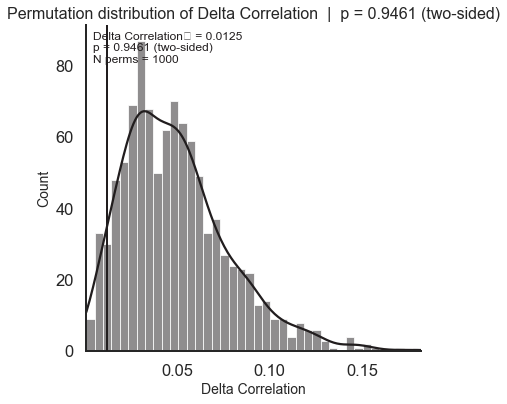

----
Total_Followup_MoCA_tstat1_average_target_in_subject, ataxia vs fluency
----


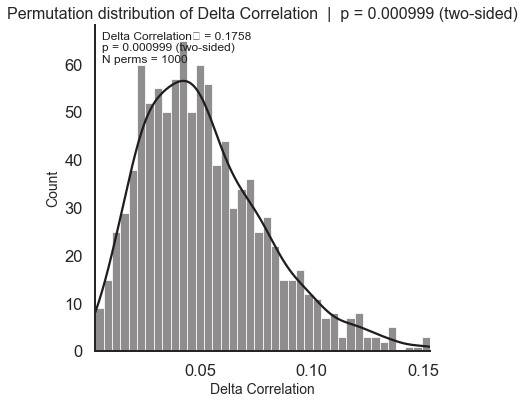

----
Total_Followup_MoCA_tstat1_average_target_in_subject, ataxia vs mood
----


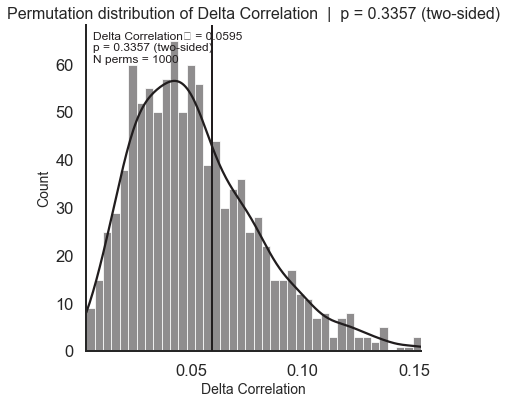

----
Total_Followup_MoCA_tstat1_average_target_in_subject, fluency vs mood
----


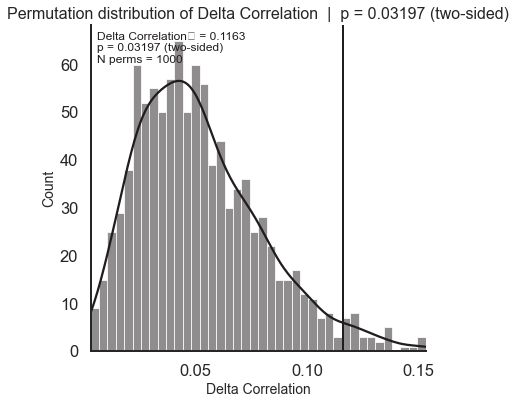

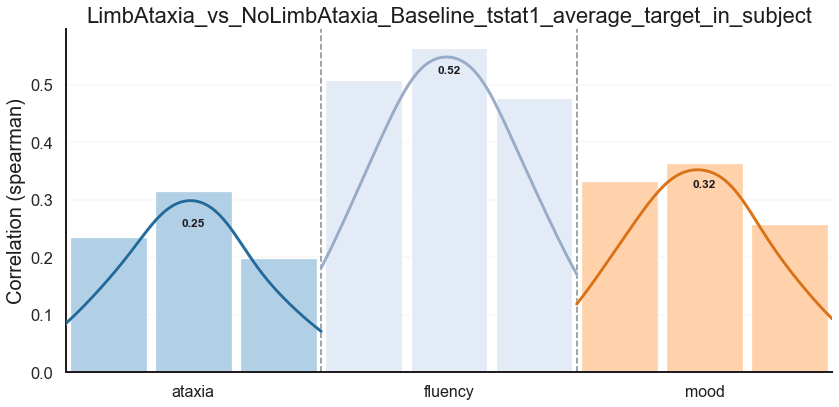

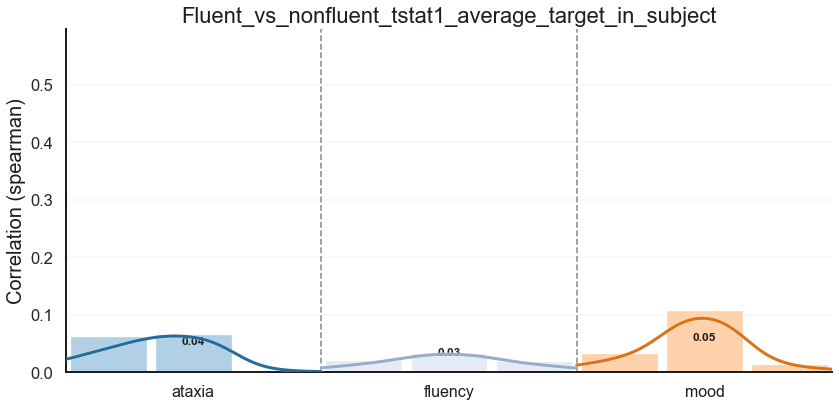

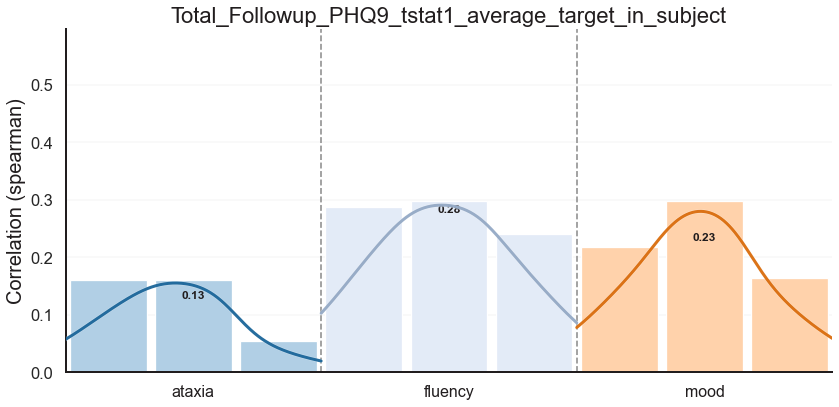

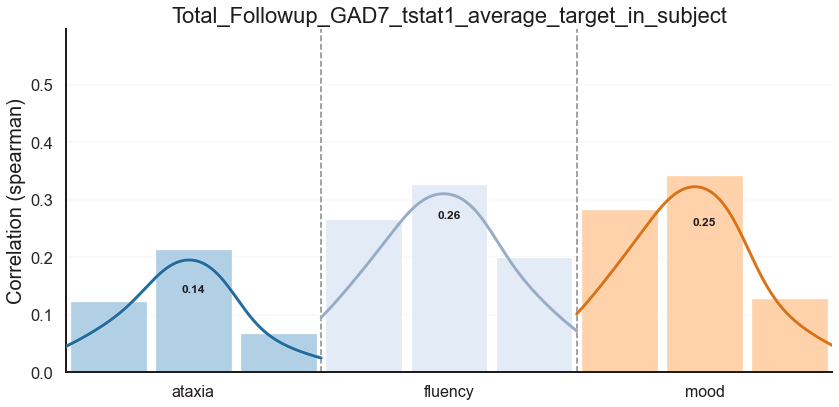

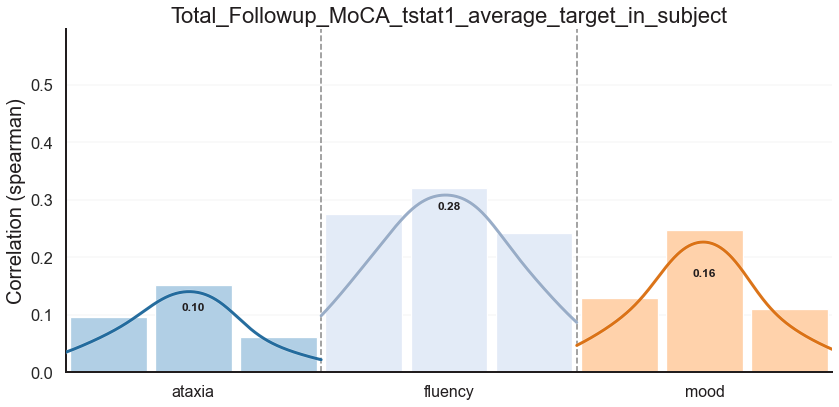

In [30]:
from calvin_utils.ccm_utils.symptom_specificity import SpecificityAnalyzer
SpecificityAnalyzer(X=dmg_df, Y=data_df, y_labels=label_dict, 
                    correlation='spearman', method='permutation',
                    vectorize=False, out_dir=out_dir+'/permutation', absval=True).run(1000)

That's all

-Calvin